# World Cup 2022 I round

Importing the needed libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import matplotlib.patches as mpatches

Downloading data from the website https://www.kaggle.com/datasets/brenda89/fifa-world-cup-2022

In [2]:
# Data https://www.kaggle.com/datasets/brenda89/fifa-world-cup-2022
df = pd.read_csv('C:/Users/xyz/Documents/Python Scripts/international_matches.csv', parse_dates = ['date'])

Creation of lists of countries playing in the first round of the World Cup

In [3]:
teams = ['Qatar', 'Ecuador', 'Senegal', 'Netherlands', 'England', 'IR Iran',
         'USA', 'Wales', 'France', 'Australia' ,'Denmark', 'Tunisia','Mexico',
         'Argentina', 'Saudi Arabia' ,'Belgium', 'Canada' ,'Spain', 'Costa Rica',
         'Morocco', 'Croatia','Switzerland', 'Cameroon','Uruguay', 'Korea Republic', 
         'Portugal', 'Ghana', 'Brazil', 'Serbia','Germany', 'Japan', 'Poland']
group1 = ['Qatar', 'Senegal', 'England', 'USA', 'France', 'Denmark', 'Mexico', 'Argentina', 'Belgium',
         'Spain', 'Germany', 'Morocco', 'Switzerland', 'Uruguay', 'Portugal', 'Brazil']
group2 = ['Ecuador', 'Netherlands', 'IR Iran', 'Wales', 'Australia', 'Tunisia', 'Poland', 'Saudi Arabia',
          'Canada', 'Costa Rica', 'Japan', 'Croatia', 'Cameroon', 'Korea Republic', 'Ghana', 'Serbia']


Data preparation. The following explanatory variables were used for the model: home_team, away_team, home_team_fifa_rank, away_team_fifa_rank, home_has_advantage (if the game is played at the host stadium), home_team_goalkeeper_score, away_team_goalkeeper_score, home_team_mean_defense_score, home_team_mean_offense_score, home_team_mean_midfield_score, away_team_mean_defense_score, away_team_mean_offense_score, away_team_mean_midfield_score, home_team_score_rolling (average goals scored in last 3 games), away_team_score_rolling (average goals lost in last 3 games). Missing data were filled using the bfill() and ffill() functions. On the other hand, when a country had no team data (goalkeeper_score, defense_score, mean_offense_score, midfield_score) then I assumed that the team was weak enough to assign it the lowest value in a given category.

In [4]:
df['home_team_goalkeeper_score'] = round(df.groupby('home_team')['home_team_goalkeeper_score'].transform(lambda x : x.fillna(x.bfill().ffill())))
df['away_team_goalkeeper_score'] = round(df.groupby('away_team')['away_team_goalkeeper_score'].transform(lambda x : x.fillna(x.bfill().ffill())))
df['home_team_mean_defense_score'] = round(df.groupby('home_team')['home_team_mean_defense_score'].transform(lambda x : x.fillna(x.bfill().ffill())))
df['away_team_mean_defense_score'] = round(df.groupby('away_team')['away_team_mean_defense_score'].transform(lambda x : x.fillna(x.bfill().ffill())))
df['home_team_mean_offense_score'] = round(df.groupby('home_team')['home_team_mean_offense_score'].transform(lambda x : x.fillna(x.bfill().ffill())))
df['away_team_mean_offense_score'] = round(df.groupby('away_team')['away_team_mean_offense_score'].transform(lambda x : x.fillna(x.bfill().ffill())))
df['home_team_mean_midfield_score'] = round(df.groupby('home_team')['home_team_mean_midfield_score'].transform(lambda x : x.fillna(x.bfill().ffill())))
df['away_team_mean_midfield_score'] = round(df.groupby('away_team')['away_team_mean_midfield_score'].transform(lambda x : x.fillna(x.bfill().ffill())))

In [5]:
df['home_team_goalkeeper_score'].fillna(df['home_team_goalkeeper_score'].min(),inplace=True)
df['away_team_goalkeeper_score'].fillna(df['away_team_goalkeeper_score'].min(),inplace=True)
df['home_team_mean_defense_score'].fillna(df['home_team_mean_defense_score'].min(),inplace=True)
df['away_team_mean_defense_score'].fillna(df['away_team_mean_defense_score'].min(),inplace=True)
df['home_team_mean_offense_score'].fillna(df['home_team_mean_offense_score'].min(),inplace=True)
df['away_team_mean_offense_score'].fillna(df['away_team_mean_offense_score'].min(),inplace=True)
df['home_team_mean_midfield_score'].fillna(df['home_team_mean_midfield_score'].min(),inplace=True)
df['away_team_mean_midfield_score'].fillna(df['away_team_mean_midfield_score'].min(),inplace=True)

Matches were eliminated in which no country from the first round played

In [6]:
df = df[(df["home_team"].apply(lambda x: x in teams)) | (df["away_team"].apply(lambda x: x in teams))]

Created variables 'home_team_if_win' (1 -> win, 0 -> draw, -1 -> lose), 'home_has_advantage' based on data from table

In [7]:
df['home_team_if_win'] = df['home_team_result'].map({'Win':1, 'Draw':0, 'Lose':-1})
df['home_has_advantage'] = df['neutral_location'].map({True:0, False:1})

A copy of all matches was created, then the host and guest were swapped (the stadium advantage was kept in the variable). The copy thus changed was then added to the original dataset. This procedure was used to eliminate favoritism for the host, especially since in the case of the World Cup virtually every team plays on a neutral ground.

In [8]:
df2 = df.copy()
df2['home_team'] = df['away_team']
df2['away_team'] = df['home_team']
df2['home_team_fifa_rank'] = df['away_team_fifa_rank']
df2['away_team_fifa_rank'] = df['home_team_fifa_rank']
df2['home_team_if_win'] = df['home_team_if_win'].map({1:-1, 0:0, -1:1})
df2['home_has_advantage'] = df['home_has_advantage'].map({1:0, 0:0})
df2['home_team_score'] = df['away_team_score']
df2['away_team_score'] = df['home_team_score']
df2['home_team_goalkeeper_score'] = df['away_team_goalkeeper_score']
df2['away_team_goalkeeper_score'] = df['home_team_goalkeeper_score']
df2['home_team_mean_defense_score'] = df['away_team_mean_defense_score']
df2['away_team_mean_defense_score'] = df['home_team_mean_defense_score']
df2['home_team_mean_offense_score'] = df['away_team_mean_offense_score']
df2['away_team_mean_offense_score'] = df['home_team_mean_offense_score']
df2['home_team_mean_midfield_score'] = df['away_team_mean_midfield_score']
df2['away_team_mean_midfield_score'] = df['home_team_mean_midfield_score']

In [9]:
df = pd.concat([df, df2])

Create explanatory variables: home_team_score_rolling (average goals scored in last 3 games),
away_team_score_rolling (average goals lost in last 3 games).

In [10]:
grouped_matches = df.groupby("home_team")
def rolling_averages(group, cols, new_cols):
    group = group.sort_values("date")
    rolling_stats = group[cols].rolling(3, closed='left').mean()
    group[new_cols] = rolling_stats
    group[new_cols[0]] = round(group.groupby('home_team')[new_cols[0]].transform(lambda x : x.fillna(x.bfill().ffill())), 2)
    group[new_cols[1]] = round(group.groupby('home_team')[new_cols[1]].transform(lambda x : x.fillna(x.bfill().ffill())), 2)
    group[new_cols[0]] = round(group.groupby('home_team')[cols[0]].transform(lambda x : x.mean()), 2)
    group[new_cols[1]] = round(group.groupby('home_team')[cols[1]].transform(lambda x : x.mean()), 2)
    return group
cols = ['home_team_score', 'away_team_score']
new_cols = [f"{c}_rolling" for c in cols]

In [11]:
df = df.groupby("home_team").apply(lambda x: rolling_averages(x, cols, new_cols))

Loading the data of the first round matches (round1.xlsx file)

In [12]:
pred = pd.read_excel('C:/Users/xyz/Documents/Python Scripts/round1.xlsx')

Completion of data on first round matches based on the latest matches of the national teams of the countries concerned

In [13]:
for i in teams:
    df[df['away_team'] == i].sort_values(by = ['date'], ascending=False).iloc[:3]['away_team_score'].mean()
    if (df[df['home_team'] == i].sort_values(by = ['date'], ascending=False).iloc[0][0]) > (df[df['away_team'] == i].sort_values(by = ['date'], ascending=False).iloc[0][0]):
        if pred.loc[pred['home_team'] == i, 'home_team'].size != 0:
            pred.loc[pred['home_team'] == i, 'home_team_goalkeeper_score'] = df[df['home_team'] == i].sort_values(by = ['date'], ascending=False).iloc[0][17]
            pred.loc[pred['home_team'] == i, 'home_team_mean_defense_score'] = df[df['home_team'] == i].sort_values(by = ['date'], ascending=False).iloc[0][19]
            pred.loc[pred['home_team'] == i, 'home_team_mean_offense_score'] = df[df['home_team'] == i].sort_values(by = ['date'], ascending=False).iloc[0][20]
            pred.loc[pred['home_team'] == i, 'home_team_mean_midfield_score'] = df[df['home_team'] == i].sort_values(by = ['date'], ascending=False).iloc[0][21]
        elif pred.loc[pred['away_team'] == i, 'away_team'].size != 0:
            pred.loc[pred['away_team'] == i, 'away_team_goalkeeper_score'] = df[df['home_team'] == i].sort_values(by = ['date'], ascending=False).iloc[0][17]
            pred.loc[pred['away_team'] == i, 'away_team_mean_defense_score'] = df[df['home_team'] == i].sort_values(by = ['date'], ascending=False).iloc[0][19]
            pred.loc[pred['away_team'] == i, 'away_team_mean_offense_score'] = df[df['home_team'] == i].sort_values(by = ['date'], ascending=False).iloc[0][20]
            pred.loc[pred['away_team'] == i, 'away_team_mean_midfield_score'] = df[df['home_team'] == i].sort_values(by = ['date'], ascending=False).iloc[0][21]
    else:
        if pred.loc[pred['home_team'] == i, 'home_team'].size != 0:
            pred.loc[pred['home_team'] == i, 'home_team_goalkeeper_score'] = df[df['away_team'] == i].sort_values(by = ['date'], ascending=False).iloc[0][18]
            pred.loc[pred['home_team'] == i, 'home_team_mean_defense_score'] = df[df['away_team'] == i].sort_values(by = ['date'], ascending=False).iloc[0][22]
            pred.loc[pred['home_team'] == i, 'home_team_mean_offense_score'] = df[df['away_team'] == i].sort_values(by = ['date'], ascending=False).iloc[0][23]
            pred.loc[pred['home_team'] == i, 'home_team_mean_midfield_score'] = df[df['away_team'] == i].sort_values(by = ['date'], ascending=False).iloc[0][24]
        elif pred.loc[pred['away_team'] == i, 'away_team'].size != 0:
            pred.loc[pred['away_team'] == i, 'away_team_goalkeeper_score'] = df[df['away_team'] == i].sort_values(by = ['date'], ascending=False).iloc[0][18]
            pred.loc[pred['away_team'] == i, 'away_team_mean_defense_score'] = df[df['away_team'] == i].sort_values(by = ['date'], ascending=False).iloc[0][22]
            pred.loc[pred['away_team'] == i, 'away_team_mean_offense_score'] = df[df['away_team'] == i].sort_values(by = ['date'], ascending=False).iloc[0][23]
            pred.loc[pred['away_team'] == i, 'away_team_mean_midfield_score'] = df[df['away_team'] == i].sort_values(by = ['date'], ascending=False).iloc[0][24]

In [14]:
for j in group1:
    pred.loc[pred['home_team'] == j, 'home_team_score_rolling'] = round(df[df['home_team'] == j].sort_values(by = ['date'], ascending=False).iloc[:3]['home_team_score_rolling'].mean(), 2)
    pred.loc[pred['home_team'] == j, 'away_team_score_rolling'] = round(df[df['home_team'] == j].sort_values(by = ['date'], ascending=False).iloc[:3]['away_team_score_rolling'].mean(), 2)

In [15]:
pred = pd.get_dummies(pred)

Remove unnecessary data from historical match data

In [16]:
df = df.drop(['neutral_location', 'home_team_total_fifa_points', 'away_team_total_fifa_points', 'home_team_continent', 'away_team_continent', 'home_team_score', 'away_team_score', 'tournament', 'city', 'country', 'shoot_out'], axis=1)

Creation of a data correlation matrix

C:\Users\xyz\anaconda3\lib\site-packages\seaborn\matrix.py:198: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
C:\Users\xyz\anaconda3\lib\site-packages\seaborn\matrix.py:203: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


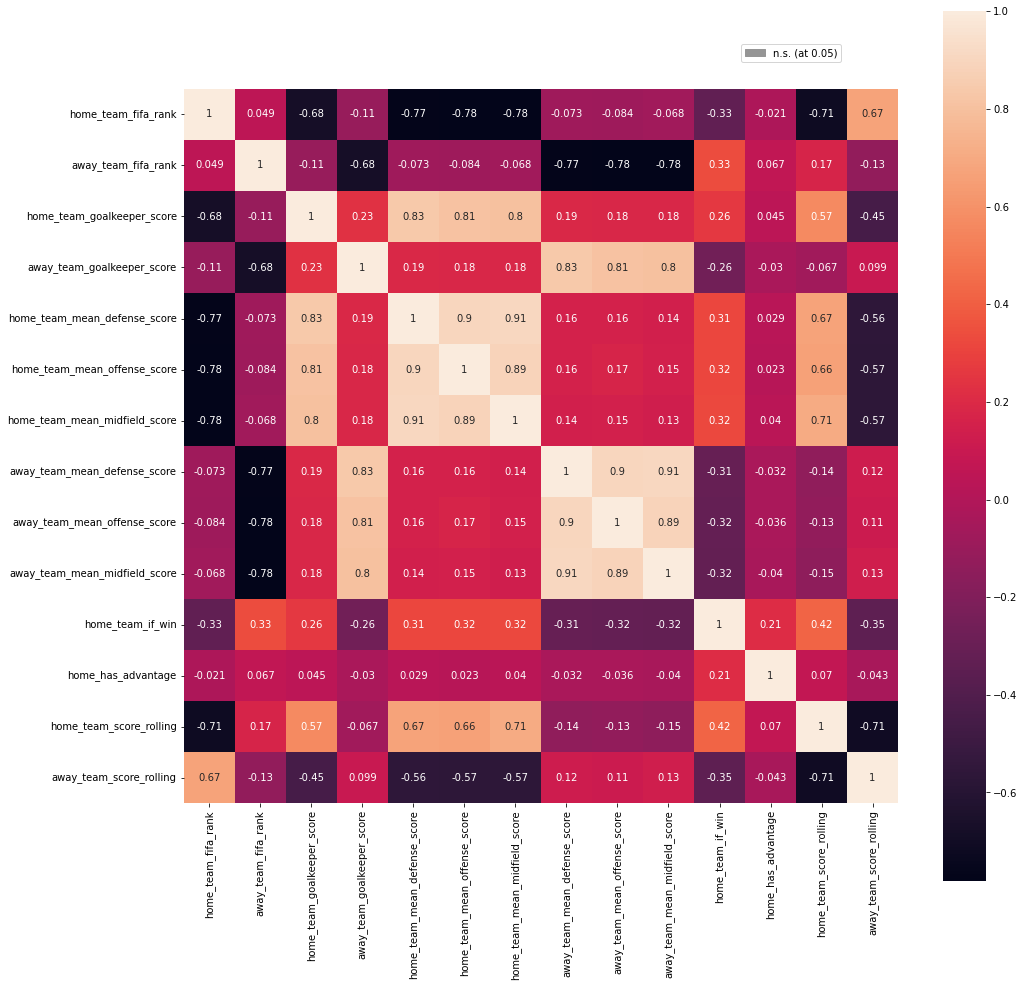

In [17]:
pvals = df.corr(method=lambda x, y: pearsonr(x, y)[1]) - np.eye(*df.corr().shape)
psig = 0.05
plt.figure(figsize=(16,16))
sns.heatmap(df.corr()[pvals<psig], annot=True, square=True)
sns.heatmap(df.corr()[pvals>=psig], annot=True, square=True, cbar=False, 
            cmap=sns.color_palette("Greys", n_colors=1, desat=1))
colors = [sns.color_palette("Greys", n_colors=1, desat=1)[0]]
texts = [f"n.s. (at {psig})"]
patches = [ mpatches.Patch(color=colors[i], label="{:s}".format(texts[i]) ) for i in range(len(texts)) ]
plt.legend(handles=patches, bbox_to_anchor=(.85, 1.05), loc='center')


The final step in the preparation of historical data

In [18]:
df = df.drop(['date', 'home_team_result'], axis=1)
df = pd.get_dummies(df)
df = df.sort_index(axis=1)

In [19]:
df = df.reset_index()
df = df.drop(['home_team', 'level_1'], axis=1)

Divide the data into explanatory variables (X) and explanatory variable (y), as well as into training and test sets.

In [20]:
X = df.drop('home_team_if_win',axis=1)
y = df['home_team_if_win']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=142)

Create a metrics_display function that trains the selected model (based on the training set), determines the predictions and compares them with the real results

In [21]:
from sklearn.metrics import classification_report,ConfusionMatrixDisplay
def metrics_display(model):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred);

Using the metrics_display function to train the DecisionTreeClassifier model

              precision    recall  f1-score   support

          -1       0.56      0.55      0.55      1407
           0       0.26      0.26      0.26       837
           1       0.57      0.58      0.57      1485

    accuracy                           0.50      3729
   macro avg       0.46      0.46      0.46      3729
weighted avg       0.50      0.50      0.50      3729



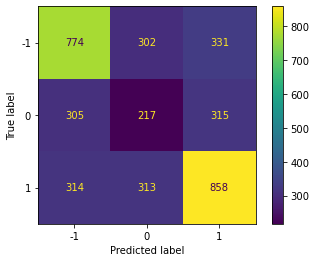

In [22]:
from sklearn.tree import DecisionTreeClassifier
metrics_display(DecisionTreeClassifier())

Using the metrics_display function to train the RandomForestClassifier model

              precision    recall  f1-score   support

          -1       0.58      0.66      0.62      1407
           0       0.28      0.14      0.19       837
           1       0.59      0.69      0.64      1485

    accuracy                           0.55      3729
   macro avg       0.48      0.50      0.48      3729
weighted avg       0.52      0.55      0.53      3729



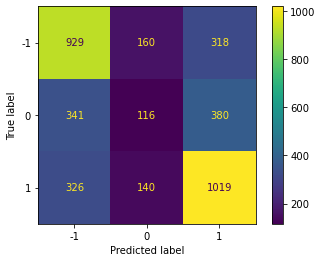

In [23]:
from sklearn.ensemble import RandomForestClassifier
metrics_display(RandomForestClassifier())

Using the metrics_display function to train the AdaBoostClassifier model

              precision    recall  f1-score   support

          -1       0.59      0.75      0.66      1407
           0       0.31      0.01      0.03       837
           1       0.60      0.76      0.67      1485

    accuracy                           0.59      3729
   macro avg       0.50      0.51      0.45      3729
weighted avg       0.53      0.59      0.52      3729



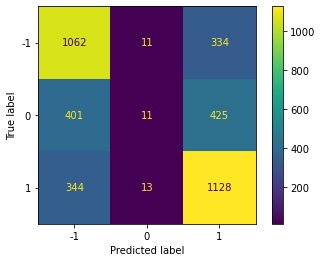

In [24]:
from sklearn.ensemble import AdaBoostClassifier
metrics_display(AdaBoostClassifier())

Of the above models, the AdaBoostClassifier model showed the highest accuracy (59%). Accordingly, I will use this model to forecast matches

Final preparation of data of projected matches

In [25]:
col = [item for item in list(X.columns) if item not in list(pred.columns)]

In [26]:
pred2 = pd.DataFrame(np.zeros((len(pred), (len(X.columns) - len(pred.columns)))), columns = col)

In [27]:
pred = pd.concat([pred, pred2], axis = 1)
pred = pred.sort_index(axis=1)

Using the AdaBoostClassifier model to predict the results of the first round of the World Cup

In [28]:
clf = AdaBoostClassifier()
clf.fit(X, y)
y_pred = clf.predict(pred)

Preparation of data with match results

In [39]:
y_pred = pd.DataFrame(y_pred, columns = ['home_team_if_win'])

In [40]:
pomoc = pd.read_excel('C:/Users/xyz/Documents/Python Scripts/round1.xlsx')

In [42]:
pred = pd.concat([pomoc[['home_team', 'away_team']], y_pred], axis = 1)

In [44]:
pred['home_team_if_win'] = pred['home_team_if_win'].map({1:'Wygrana', 0:'Remis', -1:'Przegrana'})

In [46]:
pred

,home_team,away_team,home_team_if_win
0,Qatar,Ecuador,Przegrana
1,Senegal,Netherlands,Przegrana
2,England,IR Iran,Wygrana
3,USA,Wales,Przegrana
4,France,Australia,Wygrana
5,Denmark,Tunisia,Wygrana
6,Mexico,Poland,Przegrana
7,Argentina,Saudi Arabia,Wygrana
8,Belgium,Canada,Wygrana
9,Spain,Costa Rica,Wygrana


Saving the results in a results.xlsx file. The results are attached in the 'home_team_if_win' column (1 -> win, 0 -> draw, -1 -> lose)

In [45]:
pred.to_excel('results.xlsx')